In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [128]:
img = cv2.imread("nama2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [138]:
# Definisi Masker untuk Warna
# Red
low_red1 = np.array([0, 100, 100])
up_red1 = np.array([10, 255, 255])
low_red2 = np.array([160, 100, 100])
up_red2 = np.array([180, 255, 255])
mask_red = cv2.bitwise_or(cv2.inRange(hsv, low_red1, up_red1),cv2.inRange(hsv, low_red2, up_red2))

# Green
low_green = np.array([40, 100, 100])
up_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, low_green, up_green)

# Blue
low_blue = np.array([100, 100, 100])
up_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, low_blue, up_blue)

In [146]:

def highlight_non_color_text(mask_color):
    result = np.ones_like(img_rgb) * 255  # latar belakang putih
    white_bg_mask = np.all(img_rgb >= [180, 180, 180], axis=-1)
    text_mask = np.logical_and(mask_color == 0, ~white_bg_mask)
    result[text_mask] = [0, 0, 0]
    return result


In [148]:

highlight_blue = highlight_non_color_text(mask_blue)
highlight_red = highlight_non_color_text(mask_red)
highlight_green = highlight_non_color_text(mask_green)

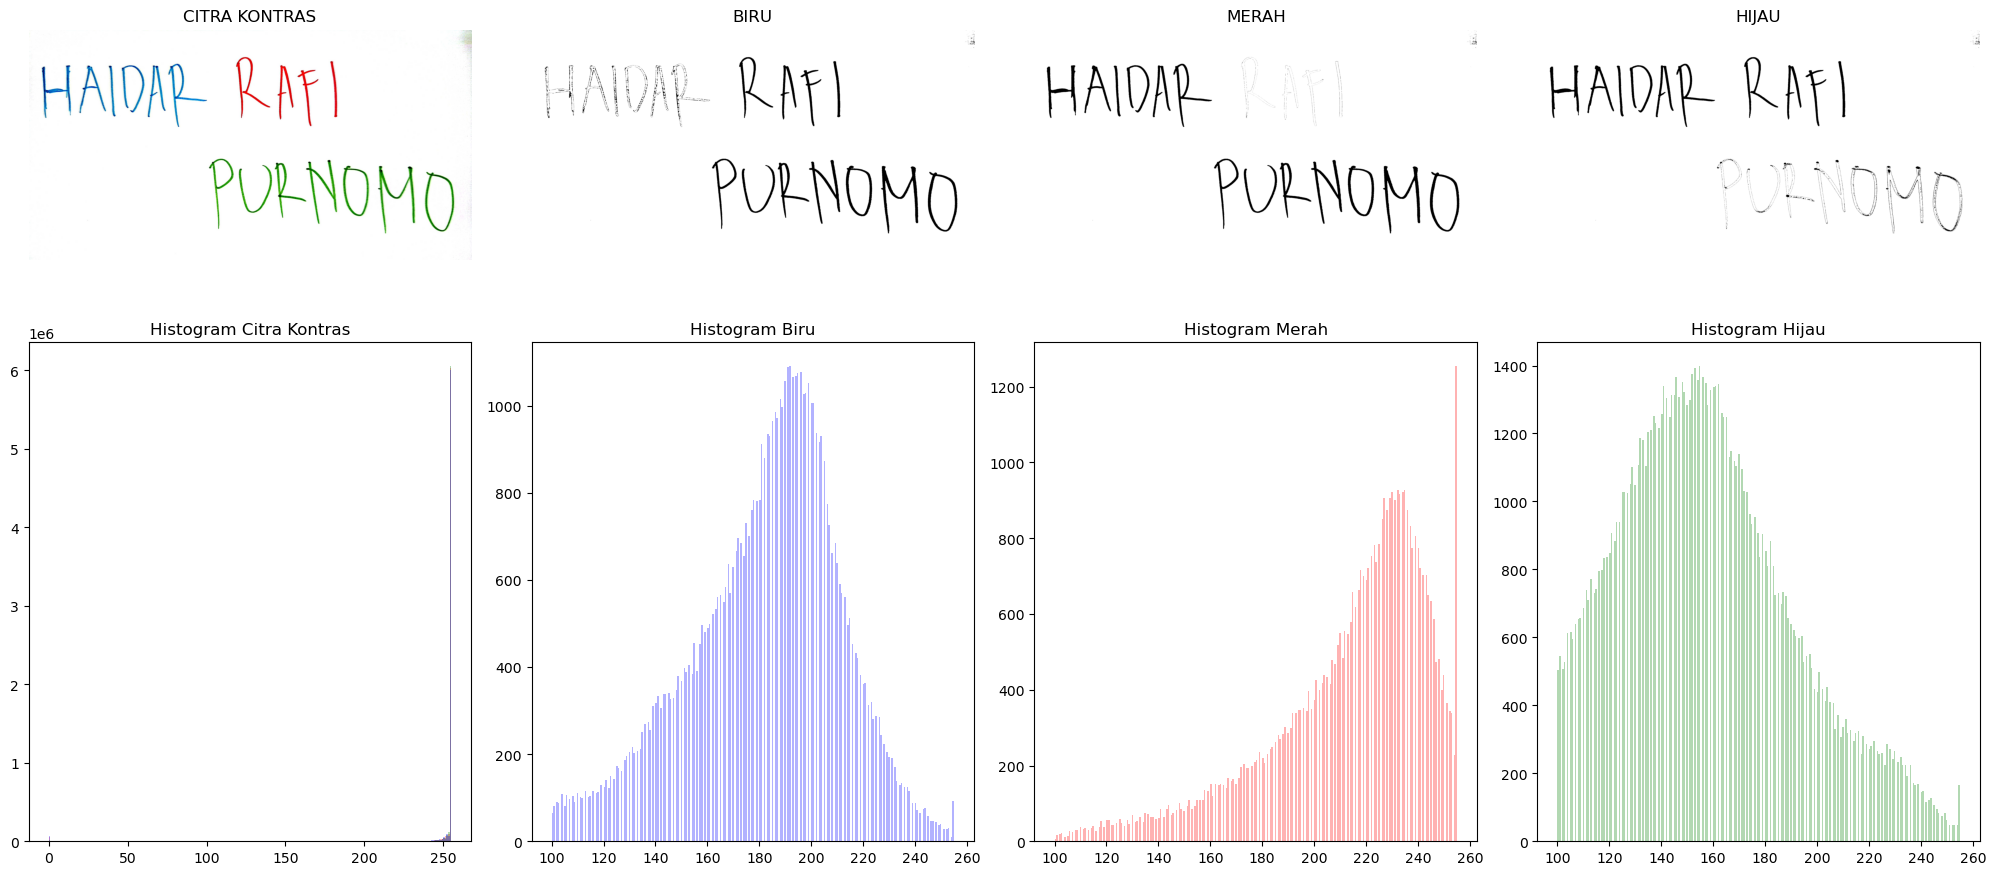

In [150]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Citra asli
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("CITRA KONTRAS")
axs[0, 0].axis('off')

# Histogram untuk citra asli
axs[1, 0].hist(img_rgb[..., 0].ravel(), bins=256, color='red', alpha=0.3)
axs[1, 0].hist(img_rgb[..., 1].ravel(), bins=256, color='green', alpha=0.3)
axs[1, 0].hist(img_rgb[..., 2].ravel(), bins=256, color='blue', alpha=0.3)
axs[1, 0].set_title("Histogram Citra Kontras")

# Biru
axs[0, 1].imshow(highlight_blue)
axs[0, 1].set_title("BIRU")
axs[0, 1].axis('off')

# Histogram untuk Biru (Saluran Biru Asli dengan Masker)
blue_pixels = img_rgb[..., 2][mask_blue == 255]
axs[1, 1].hist(blue_pixels.ravel(), bins=256, color='blue', alpha=0.3)
axs[1, 1].set_title("Histogram Biru")

# Merah
axs[0, 2].imshow(highlight_red)
axs[0, 2].set_title("MERAH")
axs[0, 2].axis('off')

# Histogram untuk Merah (Saluran Merah Asli dengan Masker)
red_pixels = img_rgb[..., 0][mask_red == 255]
axs[1, 2].hist(red_pixels.ravel(), bins=256, color='red', alpha=0.3)
axs[1, 2].set_title("Histogram Merah")

# Hijau
axs[0, 3].imshow(highlight_green)
axs[0, 3].set_title("HIJAU")
axs[0, 3].axis('off')

# Histogram untuk Hijau (Saluran Hijau Asli dengan Masker)
green_pixels = img_rgb[..., 1][mask_green == 255]
axs[1, 3].hist(green_pixels.ravel(), bins=256, color='green', alpha=0.3)
axs[1, 3].set_title("Histogram Hijau")

plt.tight_layout()
plt.show()